# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
my_btc_value = requests.get(btc_url)
btc_content = my_btc_value.content

# Fetch current ETH price
my_eth_value = requests.get(eth_url)
eth_content = my_eth_value.content
# Compute current value of my crpto
current_value = eth_content + btc_content
# Print current crypto wallet balance
print(current_value)

b'{\n\t"data": {\n\t\t"1027": {\n\t\t\t"id": 1027,\n\t\t\t"name": "Ethereum",\n\t\t\t"symbol": "ETH",\n\t\t\t"website_slug": "ethereum",\n\t\t\t"rank": 2,\n\t\t\t"circulating_supply": 115912363,\n\t\t\t"total_supply": 115912363,\n\t\t\t"max_supply": 0,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 3307.3100000000000000,\n\t\t\t\t\t"volume_24h": 83401489588,\n\t\t\t\t\t"market_cap": 386726656801,\n\t\t\t\t\t"percentage_change_1h": -3.0660282574024600,\n\t\t\t\t\t"percentage_change_24h": -9.8415252662388100,\n\t\t\t\t\t"percentage_change_7d": -15.9034412173082000,\n\t\t\t\t\t"percent_change_1h": -3.0660282574024600,\n\t\t\t\t\t"percent_change_24h": -9.8415252662388100,\n\t\t\t\t\t"percent_change_7d": -15.9034412173082000\n\t\t\t\t},\n\t\t\t\t"CAD": {\n\t\t\t\t\t"price": 3994.569018,\n\t\t\t\t\t"volume_24h": 100732319124.386,\n\t\t\t\t\t"market_cap": 467088456084.248,\n\t\t\t\t\t"percent_change_1h": -3.0660282574024600,\n\t\t\t\t\t"percent_change_24h": -9.8415252662388100,\n\t\

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [8]:
# Format current date as ISO format
current_date = pd.Timestamp("2021-05-14", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start = current_date,
    end = current_date,
    limit=1000
).df
# Preview DataFrame
df_ticker.head()

AGG                                       SPY  \
                             open    high       low   close   volume   open   
time                                                                          
2021-05-14 00:00:00-04:00  114.22  114.28  114.1219  114.28  3711363  413.2   

                                                             
                             high     low   close    volume  
time                                                         
2021-05-14 00:00:00-04:00  417.49  413.18  416.53  69029028

In [9]:
# Pick AGG and SPY close prices
agg_close_price = df_ticker["AGG"]["close"]
spy_close_price = df_ticker["SPY"]["close"]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $time
2021-05-14 00:00:00-04:00    114.28
Name: close, dtype: float64
Current SPY closing price: $time
2021-05-14 00:00:00-04:00    416.53
Name: close, dtype: float64


In [10]:
# Compute the current value of shares
my_agg_value = my_agg * int(agg_close_price)
my_spy_value = my_spy * int(spy_close_price)
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20800.00
The current value of your 200 AGG shares is $22800.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df_savings = pd.DataFrame(
    {
    "Type": ["Crypto", "Shares"],
    "Amount": [16405.628, 40616.500]
    }
        
)

# Display savings DataFrame
display(df_savings)

Type     Amount
0  Crypto  16405.628
1  Shares  40616.500

<AxesSubplot:ylabel='Amount'>

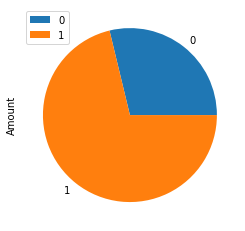

In [12]:
# Plot savings pie chart
df_savings.plot(kind='pie', y='Amount')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings["Amount"].sum()

# Validate saving health
if total_savings >= emergency_fund:
    print("Yes, safety net looks good!")
else:
    print("I'm afraid not.")

Yes, safety net looks good!


In [14]:
total_savings

57022.128

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2016-08-17 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2016-08-18 00:00:00-04:00  218.33  218.90  218.21  218.87  42850145.0  
2016-08-19 00:00:00-04:00  218.31  218.75  217.74  218.57  52238224.0  
2016-08-22 00:00:00-04:00  218.27  218.80  217.83  218.50  48628907.0  
2016-08-23 00:00:00-04:00  219.25  219.60  218.90  218.94  41981207.0

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_fiveyear = MCSimulation(portfolio_data=df_stock_data, num_simulation =500, num_trading_days = 252* 30)

In [18]:
# Printing the simulation input data
MC_fiveyear.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-08-17 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2016-08-18 00:00:00-04:00     0.001110  218.33  218.90  218.21  218.87   
2016-08-19 00:00:00-04:00    -0.001908  218.31  218.75  217.74  218.57   
2016-08-22 00:00:00-04:00     0.001422  218.27  218.80  217.83  218.50   
2016-08-23 00:00:00-04:00     0.000355  219.25  219.60  218.90  218.94   

                                                    
                               volume daily_return  
time                                                
2016-08-17 00:00:00-04:00         NaN          NaN  
2016-08-18 00:00:00-04:00  42850145.0          NaN  
2016-08-19 00:00:00-04:00  52238224.0    -0.001371  
2016-08-22 00:00:00-04:00  48628907.0    -0.000320  
2016-08-23 00:00:00-04:00  41981207.0     0.002014

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5          6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   1.000000   
1     0.991570  0.997151  0.993543  0.987656  0.995091  1.013617   1.010448   
2     1.003974  0.987407  0.996216  0.990967  0.997391  1.013784   0.999518   
3     1.012218  0.981732  1.005956  0.990012  0.992483  1.016557   0.993767   
4     1.017214  0.975486  1.014116  0.989764  0.997706  1.016347   0.988907   
...        ...       ...       ...       ...       ...       ...        ...   
7556  8.831710  3.672039  4.409619  7.894320  6.860902  5.232370  18.378174   
7557  8.821748  3.696369  4.432187  7.834437  6.819258  5.213385  18.567447   
7558  8.798401  3.696141  4.425746  7.825245  6.751199  5.220490  18.774565   
7559  8.762396  3.714143  4.436140  7.849321  6.741047  5.212357  18.655078   
7560  8.706031  3.707568  4.410574  7.879740  6.731211  5.194957  18.725979   

            7          8          9    ...       490        491       492  \
0      1.000000   1.000000   1.000000  ...  1.000000   1.000000  1.000000   
1      0.991841   1.002395   0.996846  ...  0.991132   0.992409  1.006921   
2      0.991116   1.007349   0.990837  ...  0.996803   0.981899  0.997135   
3      0.997996   1.014717   0.995860  ...  1.004531   0.980288  0.993883   
4      1.010316   1.015132   1.000286  ...  1.004820   0.990674  0.989734   
...         ...        ...        ...  ...       ...        ...       ...   
7556  11.450147  13.735652  13.993091  ...  9.695923   9.935674  7.569977   
7557  11.465842  13.670726  13.941790  ...  9.795146  10.009033  7.582188   
7558  11.589533  13.686117  13.925496  ...  9.801488  10.032339  7.585942   
7559  11.635521  13.895223  13.920080  ...  9.756188  10.052616  7.571432   
7560  11.637029  13.748884  14.028025  ...  9.786929  10.173545  7.642912   

           493       494       495       496       497        498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000   1.000000  1.000000  
1     1.001904  0.999723  1.002044  0.992210  0.999202   1.009038  0.992027  
2     1.004305  0.991558  1.007198  0.982943  0.989545   1.003650  0.983817  
3     1.008364  1.003917  1.020117  0.983582  0.985847   0.993854  0.975209  
4     1.010715  1.006053  1.024434  0.988166  1.001415   0.994530  0.975507  
...        ...       ...       ...       ...       ...        ...       ...  
7556  9.225970  9.628159  5.721893  8.801704  5.068896  19.237507  5.952150  
7557  9.284507  9.547974  5.737552  8.859050  5.016968  19.113379  5.974029  
7558  9.311640  9.546660  5.735013  8.837893  4.993129  19.226966  6.032126  
7559  9.192115  9.560287  5.746823  8.922153  4.966678  19.231912  6.052803  
7560  9.183848  9.681093  5.700084  8.895593  5.025811  19.067193  6.049613  

[7561 rows x 500 columns]

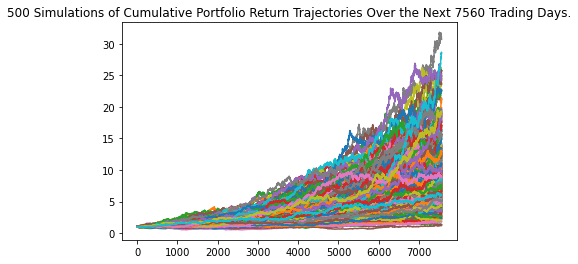

In [20]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

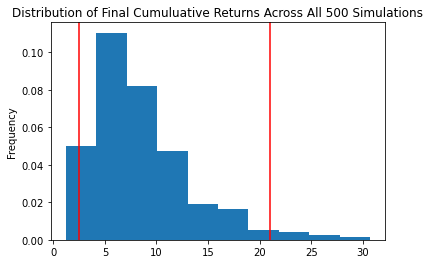

In [21]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
tbl

count           500.000000
mean              8.507298
std               4.819315
min               1.205711
25%               5.036820
50%               7.434642
75%              10.473571
max              30.716966
95% CI Lower      2.442631
95% CI Upper     21.006423
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000, 2)
ci_upper = round(tbl[9]*20000, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $48852.61 and $420128.45


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000, 3)
ci_upper = round(tbl[9]*30000, 3)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $73278.917 and $630192.678


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_bonus = MCSimulation(portfolio_data=df_stock_data, num_simulation =500, num_trading_days = 252* 5)

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_bonus.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.996234  1.006166  1.003512  0.996213  1.006975  1.004040  0.999537   
2     1.003323  0.994188  0.993763  0.988157  1.007250  0.993401  0.991927   
3     1.008204  0.986133  0.998856  0.986379  0.995964  1.004784  0.995487   
4     1.021208  0.991701  1.009843  0.985162  0.987449  1.013359  0.994662   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.777529  1.704389  1.632461  1.319770  1.649809  1.052041  1.482946   
1257  1.774184  1.709215  1.646691  1.325581  1.645711  1.057709  1.496246   
1258  1.773370  1.712403  1.640365  1.322855  1.646714  1.069429  1.513068   
1259  1.755896  1.724196  1.671785  1.311988  1.635009  1.069331  1.510673   
1260  1.750279  1.713314  1.676883  1.325852  1.635586  1.067187  1.511731   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.997326  1.005524  0.984324  ...  0.993677  0.992464  0.988504   
2     0.996269  1.004803  0.999309  ...  0.998508  0.992982  0.988249   
3     1.000819  1.009953  0.997025  ...  0.996035  0.987221  0.989044   
4     1.008393  1.011862  0.997885  ...  0.981509  0.992873  0.986085   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.752241  1.266438  1.988251  ...  1.999413  1.146544  1.653630   
1257  1.770502  1.275169  1.971707  ...  1.980881  1.144843  1.663525   
1258  1.763615  1.278068  1.973776  ...  1.990150  1.148689  1.665293   
1259  1.769856  1.285915  1.971371  ...  1.970517  1.146886  1.663367   
1260  1.774321  1.270278  1.960252  ...  1.962283  1.130242  1.647195   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.995696  0.998851  1.005268  1.000791  0.988824  0.992865  0.997313  
2     1.000804  1.005196  0.997453  0.998809  0.987988  0.996026  0.997062  
3     0.999509  1.003035  0.993149  1.000359  0.985204  0.990356  1.001293  
4     0.997193  1.008666  1.002550  1.002444  0.985758  0.994996  1.003648  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.239099  1.593597  1.847310  1.146359  1.201794  1.077804  1.260795  
1257  1.242219  1.589483  1.848178  1.146771  1.200915  1.082205  1.259174  
1258  1.247672  1.589786  1.834281  1.157041  1.213461  1.078726  1.258325  
1259  1.243145  1.577043  1.836095  1.158866  1.209626  1.072175  1.267576  
1260  1.246445  1.571987  1.861354  1.155933  1.204710  1.070338  1.253315  

[1261 rows x 500 columns]

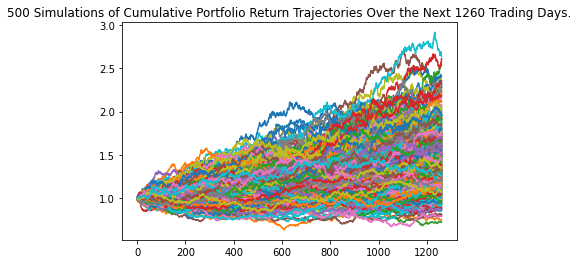

In [27]:
# Plot simulation outcomes
bonus_plot = MC_bonus.plot_simulation()

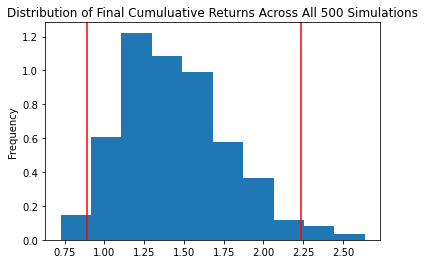

In [28]:
# Plot probability distribution and confidence intervals
dist_bonus = MC_bonus.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl2 = MC_bonus.summarize_cumulative_return()

# Print summary statistics
tbl2

count           500.000000
mean              1.444609
std               0.336845
min               0.724480
25%               1.198179
50%               1.407157
75%               1.668448
max               2.637728
95% CI Lower      0.892873
95% CI Upper      2.233620
Name: 1260, dtype: float64

In [30]:
# Set initial investment
bonus_investment1 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl2[8]*60000, 2)
ci_upper_five = round(tbl2[9]*60000, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $53572.38 and $134017.23


### Ten Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(portfolio_data=df_stock_data, num_simulation =500, num_trading_days = 252* 10)

In [32]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.992416  0.994217  1.002122  0.995116  1.005865  1.008118  1.004193   
2     0.998947  0.996468  1.005763  0.998682  0.991322  1.012400  1.014183   
3     1.013740  0.995725  1.005058  1.010415  0.986684  1.015884  1.019699   
4     1.014309  0.994545  1.000624  1.012414  0.989263  1.021759  1.006608   
...        ...       ...       ...       ...       ...       ...       ...   
2516  3.145269  2.892517  1.943974  1.862530  1.441316  2.018244  1.796437   
2517  3.126826  2.818557  1.918633  1.858114  1.448973  2.021927  1.802014   
2518  3.106519  2.815752  1.916731  1.841619  1.451114  2.018853  1.811968   
2519  3.096814  2.844185  1.897925  1.847995  1.475905  2.029006  1.804218   
2520  3.100201  2.884741  1.895681  1.858889  1.482061  2.018831  1.813327   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.003094  1.002621  1.006502  ...  0.995935  1.000216  1.001723   
2     0.996389  1.004530  1.009388  ...  0.998502  0.992163  0.999387   
3     0.985865  1.009342  0.998187  ...  0.988910  0.993037  1.010481   
4     0.987724  1.000506  0.989194  ...  0.987123  0.999552  1.005218   
...        ...       ...       ...  ...       ...       ...       ...   
2516  2.754051  2.566951  2.666200  ...  2.244563  2.666139  1.592681   
2517  2.722509  2.576763  2.710147  ...  2.238505  2.643326  1.614215   
2518  2.727113  2.590089  2.722184  ...  2.259318  2.637836  1.616901   
2519  2.694195  2.599080  2.725344  ...  2.285552  2.635491  1.624448   
2520  2.706187  2.600810  2.728893  ...  2.282612  2.618916  1.617090   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.988041  1.007334  0.996195  1.000512  1.011498  1.007513  1.001614  
2     0.988105  1.007037  1.004014  0.993002  1.014044  1.016528  0.986908  
3     0.992788  1.010940  1.003374  0.997080  1.019537  1.012627  1.000861  
4     0.998959  1.002586  1.008901  0.996326  1.031076  1.017887  0.996158  
...        ...       ...       ...       ...       ...       ...       ...  
2516  1.838867  1.652005  1.094337  1.098074  1.429888  1.394247  1.659149  
2517  1.847720  1.678775  1.087883  1.103633  1.434439  1.411834  1.647714  
2518  1.857546  1.683474  1.080618  1.098055  1.444882  1.414619  1.650788  
2519  1.868495  1.683667  1.090978  1.101658  1.440106  1.413539  1.671350  
2520  1.881058  1.677783  1.090016  1.106486  1.432913  1.419539  1.664247  

[2521 rows x 500 columns]

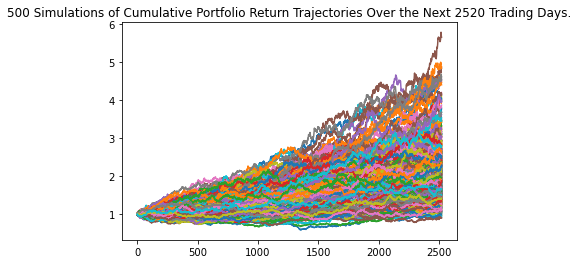

In [33]:
# Plot simulation outcomes
tenline_plot = MC_tenyear.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

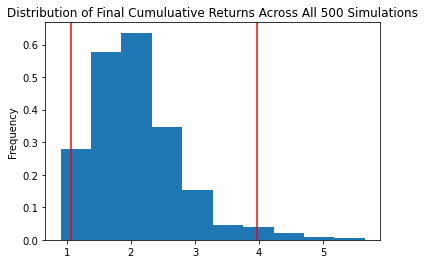

In [34]:
# Plot probability distribution and confidence intervals
MC_tenyear.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
tentbl = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
tentbl

count           500.000000
mean              2.078468
std               0.709889
min               0.902005
25%               1.574347
50%               1.980304
75%               2.431292
max               5.648671
95% CI Lower      1.073199
95% CI Upper      3.965192
Name: 2520, dtype: float64

In [38]:
# Set initial investment
bonus_invest10 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tentbl[8]*60000, 2)
ci_upper_ten = round(tentbl[9]*60000, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $64391.93 and $237911.5


In [39]:
## I enjoy this stuff!